# Level 2 - Task 1

## Task: Table Booking and Online Delivery

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

# Importing the Warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the Dataset

df1 = pd.read_csv("/content/New_dataset.csv")

In [4]:
df1.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**1. Determine the percentage of restaurants that offer table booking and online delivery.**

In [6]:
# Check for value counts
df1["Has Table booking"].value_counts()

,count
Has Table booking,
No,8393
Yes,1158


In [7]:
df1["Has Online delivery"].value_counts()

,count
Has Online delivery,
No,7100
Yes,2451


In [8]:
print("Table Booking : ", round((1158/(8393+1158)) *100, 2),"%")

print("Online Delivery : ", round((2451/(7100+2451)) *100, 2),"%")

Table Booking :  12.12 %
Online Delivery :  25.66 %


In [9]:
# Number of restaurants offering table booking & online delivery

table_booking = df1['Has Table booking'].value_counts().get('Yes')

online_delivery = df1['Has Online delivery'].value_counts().get('Yes')

# Calculate the percentage for table booking * online delivery

percentage_table_booking = (table_booking / len(df1)) * 100

percentage_online_delivery = (online_delivery / len(df1)) * 100

print(f"Percentage of Restaurants offers table booking: {percentage_table_booking:.2f} %\n")
print(f"Percentage of Restaurants offers online delivery: {percentage_online_delivery:.2f} %")

Percentage of Restaurants offers table booking: 12.12 %

Percentage of Restaurants offers online delivery: 25.66 %


**2. Compare the average ratings of restaurants with table booking and those without.**

In [10]:
# Filter the DataFrame for rows with 'Yes' & 'No' in the 'Table Booking' column

df_with_table_booking = df1[df1['Has Table booking'] == 'Yes']

df_without_table_booking = df1[df1['Has Table booking'] == 'No']

# After filtering rows with and without table booking

print("Rows With Table Booking :", df_with_table_booking.shape)

print("Rows Without Table Booking :", df_without_table_booking.shape)

Rows With Table Booking : (1158, 21)
Rows Without Table Booking : (8393, 21)


In [11]:
# Average Ratings of Restaurants

print("Average Ratings:- ")
print(" With Table Booking : ", round(df_with_table_booking["Aggregate rating"].mean(),2))
print(" Without Table Booking : ", round(df_without_table_booking["Aggregate rating"].mean(),2))

Average Ratings:- 
 With Table Booking :  3.44
 Without Table Booking :  2.56


**3. Analyze the availability of online delivery among restaurants with different price ranges.**

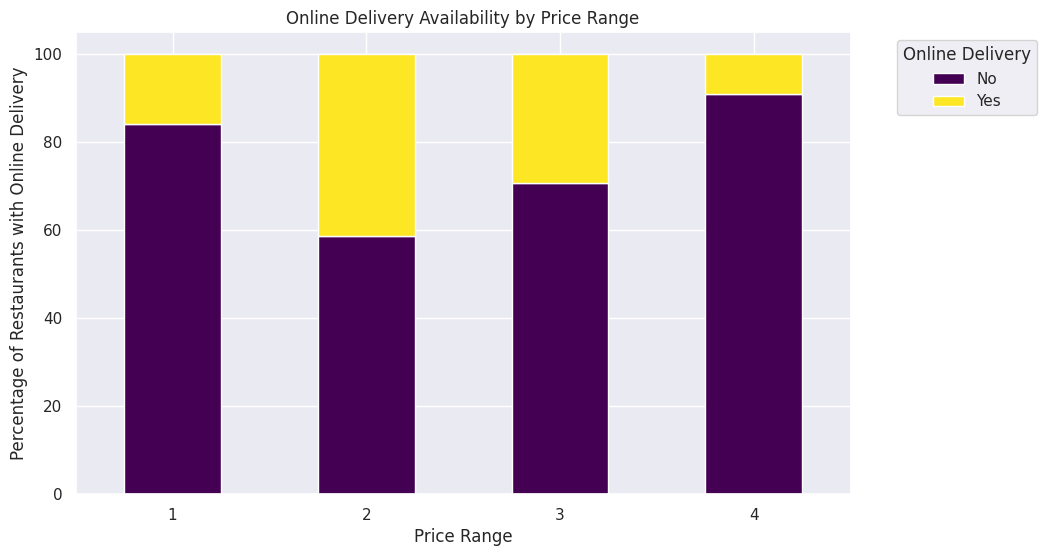

In [12]:
# Group by 'Price range' and calculate the percentage of restaurants with online delivery

Online_Delivery_by_price_range = df1.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100

Online_Delivery_by_price_range.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Online Delivery')
plt.xticks(rotation = 0)
plt.legend(title='Online Delivery', bbox_to_anchor=(1.05, 1))

plt.show()

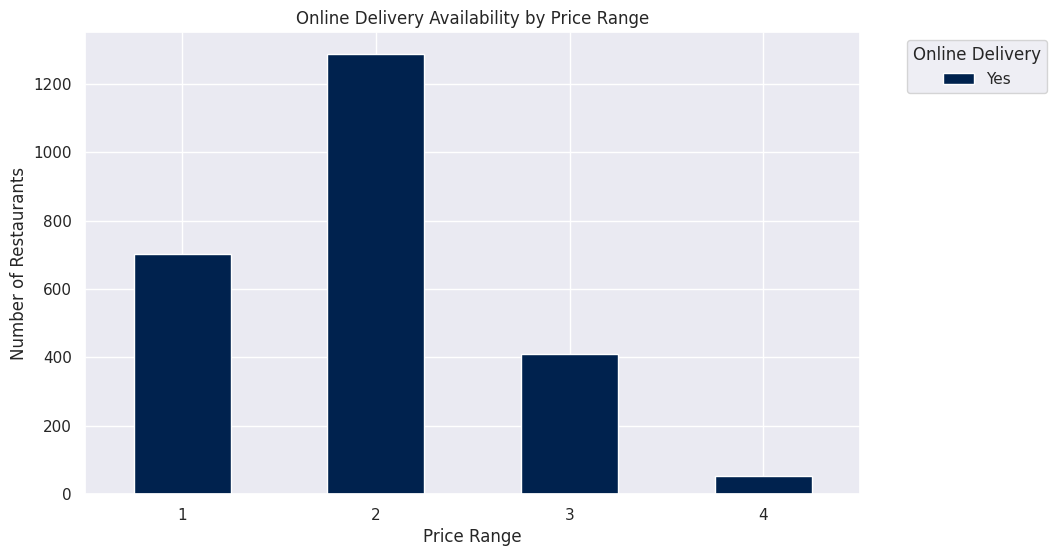

In [13]:
# Taking only those restaurant with online Delivery available

Online_Delivery_Yes = df1[df1['Has Online delivery'] == 'Yes']

# Group by 'Price range' and calculate the percentage of restaurants with online delivery

Online_Delivery_counts = Online_Delivery_Yes.groupby(['Price range', 'Has Online delivery']).size().unstack()

Online_Delivery_counts.plot(kind='bar', stacked=True, colormap='cividis', figsize=(10, 6))
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation = 0)
plt.legend(title='Online Delivery', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

*   From the first graph, we observe that most restaurants do not offer online delivery services. In price range 1, less than 20% provide this option, while around 40% do in price range 2. For price range 3, approximately 30% of restaurants offer online delivery, and in price range 4, only about 10% do.
*   The second graph indicates that most people prefer purchasing food from price range 2, while very few opt for price range 4, likely due to its higher cost compared to the other categories.

# Level 2 - Task 2

## Task: Price Range Analysis

**1. Determine the most common price range among all the restaurants.**

In [14]:
df1["Price range"].value_counts()

,count
Price range,
1,4444
2,3113
3,1408
4,586


In [15]:
most_common = df1["Price range"].mode()[0]

print("Most Common Price range among all the restaurant : ", most_common)

Most Common Price range among all the restaurant :  1


**2. Calculate the average rating for each price range. And Identify the color that represents the highest average rating among different price ranges.**

In [16]:
Avg_Rating_by_price_range = df1.groupby('Price range')['Aggregate rating'].mean().round(2)

print("Average Rating for each price range :")
print(Avg_Rating_by_price_range)

Average Rating for each price range :
Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


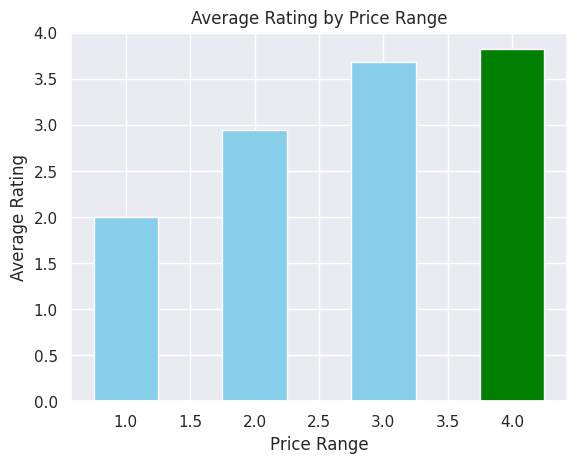

In [17]:
# Find the price range with the highest average rating
highest_avg_rating_color = Avg_Rating_by_price_range.idxmax()

plt.bar(Avg_Rating_by_price_range.index, Avg_Rating_by_price_range, color='skyblue', width=0.5)

plt.bar(highest_avg_rating_color, Avg_Rating_by_price_range[highest_avg_rating_color], color='green', width=0.5)

plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Rating by Price Range')

plt.show()

* Price range 4 get the highest average rating, which is 3.82, followed by price range 3, 2 and 1


# Level 2  - Task 3

## Task: Feature Engineering

**1. Extract additional features from the existing columns, such as the length of the restaurant name or address.**

In [18]:
# Extract the length of the restaurant name and address and create new columns

df1['Restaurant Name Length'] = df1['Restaurant Name'].apply(lambda x: len(str(x)))

df1['Address Length'] = df1['Address'].apply(lambda x: len(str(x)))

In [19]:
df1[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']]

,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64
...,...,...,...,...
9546,Naml۱ Gurme,11,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",103
9547,Ceviz A��ac۱,12,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",77
9548,Huqqa,5,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",73
9549,A���k Kahve,11,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",75


**2. Create new features like "Has Table Booking"or "Has Online Delivery" by encoding categorical variables.**

In [20]:
# Creating new features "Has Table Booking" and "Has Online Delivery"

df1['Has Table Booking'] = df1['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)

df1['Has Online Delivery'] = df1['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [21]:
df1[['Has Table booking', 'Has Table Booking', 'Has Online delivery', 'Has Online Delivery']]

,Has Table booking,Has Table Booking,Has Online delivery,Has Online Delivery
0,Yes,1,No,0
1,Yes,1,No,0
2,Yes,1,No,0
3,No,0,No,0
4,Yes,1,No,0
...,...,...,...,...
9546,No,0,No,0
9547,No,0,No,0
9548,No,0,No,0
9549,No,0,No,0


## Observations:

*  The percentage of restaurants offering table booking is 12.12%, while 25.66% of restaurants provide online delivery services.

* The average rating for restaurants with table booking is 3.44, whereas those without table booking have a lower average rating of 2.56.

* Most restaurants do not offer online delivery services. In price range 1, less than 20% have this option, around 40% in price range 2, approximately 30% in price range 3, and only 10% in price range 4.

* Consumers primarily purchase food from price range 2, while very few opt for price range 4, possibly due to its higher cost compared to the others.

* Price range 1 is the most common among all restaurants.

* Price range 4 has the highest average rating (3.82), followed by price ranges 3, 2, and 1 in descending order.